In [168]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

Таблица calls (информация о звонках):
- id - уникальный номер звонка;
- call_date - дата звонка;
- duration - длительность звонка в минутах;
- user_id - идентификатор пользователя, сделавшего звонок.

Таблица messages (информация о сообщениях):
- id - уникальный номер сообщения;
- message_date - дата сообщения;
- user_id - идентификатор пользователя, отправившего сообщение.

Таблица internet (информация об интернет-сессиях):
- id - уникальный номер сессии;
- mb_used - объем потраченного за сессию интернет-трафика (в мегабайтах);
- session_date - дата инернет-сессии;
- user_id - идентификатор пользователя.

Таблица tariffs (информация о тарифах):
- tariff_name - название тарифа;
- rub_monthly_fee - ежемесячная абонентская плата в рублях;
- minutes_included - количество минут разговора в месяц, включенных в абонентскую плату;
- messages_included - количество сообщений в месяц, включенных в абонентскую плату;
- mp_per_month_included - объем интернет-трафика, включенного в абонентскую плату (в мегабайтах);
- rub_per_minute - стоимость минутного разговора сверх тарифного пакета;
- rub_per_messages - стоимость отправки сообщения сверх тарифного пакета;
- rub_per_gb - стоимость дополнительного гигабайта интернет-трафика сверх тарифного пакета.

Таблица users (информация о пользователях):
- user_id - уникальный идентификатор пользователя;
- first_name - имя;
- last_name - фамилия;
- age - возраст;
- reg_date - дата подключения тарифа;
- churn_date - дата прекращения пользования тарифом;
- city - город проживания пользователя;
- tariff - название тарифного плана.

Рассмотрим имеющиеся данные, преобразуем их к нужным типам, удалим лишние столбцы

In [169]:
df_calls = pd.read_csv('C:/Users/atche/calls.csv')
df_calls.head()

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000


Преобразуем колонки к более удобным для анализа, удалим лишние; приведем данные к нужным типам

In [170]:
new_df = df_calls['id'].str.split('_', expand = True)
new_df.columns = ['user','id_calls']
df_calls = pd.concat([df_calls, new_df], axis = 1)
df_calls = df_calls.drop(['user_id'], axis = 1).drop(['id'], axis = 1)

df_calls['call_date'] = pd.to_datetime(df_calls['call_date'])

df_calls['duration'] = pd.to_numeric(df_calls['duration'], downcast = 'float')

N = [1, 2, 3]
 
columns = list(df_calls)
col = [columns[i] for i in N]
for i in col:
    a = df_calls[i]
    df_calls[i] = pd.to_numeric(a, downcast = 'signed')
    
df_calls.head()

,call_date,duration,user,id_calls
0,2018-07-25,0.00,1000,0
1,2018-08-17,0.00,1000,1
2,2018-06-11,2.85,1000,2
3,2018-09-21,13.80,1000,3
4,2018-12-15,5.18,1000,4


Звонки длительностью 0 минут мы можем воспринимать, как пропущенные. Создадим дополнительный датафрейм df_calls_1, в котором не будет данных по пропущенных звонкам. В дальнейшем сможем увидеть, как пропущенные звонки влияют на результаты анализа данных

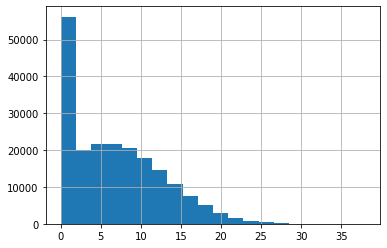

In [171]:
df_calls['duration'].hist(bins = 20)

In [172]:
df_calls_1 = df_calls.loc[df_calls['duration'] > 0]

In [173]:
df_internet = pd.read_csv('C:/Users/atche/internet.csv')

In [174]:
new_df = df_internet['id'].str.split('_', expand = True)
new_df.columns = ['user','id_session']
df_internet = pd.concat([df_internet, new_df], axis = 1)
df_internet = df_internet.drop(['user_id'], axis = 1).drop(['id'], axis = 1).drop(['Unnamed: 0'], axis = 1)

df_internet['session_date'] = pd.to_datetime(df_internet['session_date'])

df_internet['mb_used'] = pd.to_numeric(df_internet['mb_used'], downcast = 'float')

N = [2, 3]
 
columns = list(df_internet)
col = [columns[i] for i in N]
for i in col:
    a = df_internet[i]
    df_internet[i] = pd.to_numeric(a, downcast = 'signed')
    
df_internet.head()

,mb_used,session_date,user,id_session
0,112.949997,2018-11-25,1000,0
1,1052.810059,2018-09-07,1000,1
2,1197.260010,2018-06-25,1000,2
3,550.270020,2018-08-22,1000,3
4,302.559998,2018-09-24,1000,4


Возможно, значения признака "mb_used", равные 0, - это "неудачные" сессии, попытки зайти в интернет при отсутсвии денежных средств или приемлемого качества связи.

Аналогично предыдущему датафрейму создадим дополнительную таблицу, исключающую значения трафика, равные 0.

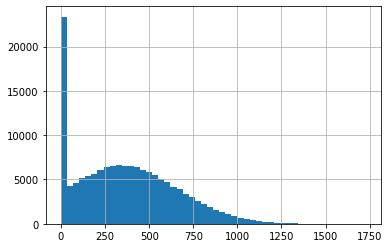

In [175]:
df_internet['mb_used'].hist(bins = 50)

In [176]:
df_internet_1 = df_internet.loc[df_internet.mb_used > 0]

In [177]:
df_messages = pd.read_csv('C:/Users/atche/messages.csv')

In [178]:
new_df = df_messages['id'].str.split('_', expand = True)
new_df.columns = ['user','id_session']
df_messages = pd.concat([df_messages, new_df], axis = 1)
df_messages = df_messages.drop(['user_id'], axis = 1) \
    .drop(['id'], axis = 1)

df_messages['message_date'] = pd.to_datetime(df_messages['message_date'])

N = [1, 2]
 
columns = list(df_messages)
col = [columns[i] for i in N]
for i in col:
    a = df_messages[i]
    df_messages[i] = pd.to_numeric(a, downcast = 'signed')
    
df_messages.head()

,message_date,user,id_session
0,2018-06-27,1000,0
1,2018-10-08,1000,1
2,2018-08-04,1000,2
3,2018-06-16,1000,3
4,2018-12-05,1000,4


In [179]:
df_tariffs = pd.read_csv('C:/Users/atche/tariffs.csv')

In [180]:
dict_1 = {'smart': 0, 'ultra': 1}
df_tariffs = df_tariffs.replace({"tariff_name": dict_1})

In [181]:
N = [0, 1, 2, 3, 4, 5, 6, 7]
 
columns = list(df_tariffs)
col = [columns[i] for i in N]
for i in col:
    a = df_tariffs[i]
    df_tariffs[i] = pd.to_numeric(a, downcast = 'signed')
    
df_tariffs.head()

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,0
1,1000,30720,3000,1950,150,1,1,1


In [182]:
df_users = pd.read_csv('C:/Users/atche/users.csv')

In [183]:
df_users = df_users.replace({"tariff": dict_1})

N = [0, 1, 7]
 
columns = list(df_users)
col = [columns[i] for i in N]
for i in col:
    a = df_users[i]
    df_users[i] = pd.to_numeric(a, downcast = 'signed')
    
N = [2, 6]
col = [columns[i] for i in N]

for i in col:
    a = df_users[i]
    df_users[i] = pd.to_datetime(df_users[i])
    
df_users.head()

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,1
1,1001,41,NaT,Москва,Иван,Ежов,2018-11-01,0
2,1002,59,NaT,Стерлитамак,Евгений,Абрамович,2018-06-17,0
3,1003,23,NaT,Москва,Белла,Белякова,2018-08-17,1
4,1004,68,NaT,Новокузнецк,Татьяна,Авдеенко,2018-05-14,1


Пропущенные значения в признаке "churn_date" означают, что на момент выгрузки данных тарифом продолжали пользоваться

In [184]:
df_users.isna().sum().to_frame(name = "nans").query("nans > 0")["nans"]

churn_date    462
Name: nans, dtype: int64

Далее необходимо подсчитать количество сделанных звонков и израсходованных минут по месяцам, количество отправленных сообщений по месяцам, объем ихрасходованного интернет-трафика по месяцам.

In [185]:
df_calls['month'] = df_calls['call_date'].dt.month
df_1 = df_calls.groupby(['month'], as_index = False).count()
df_1 = df_1[['month', 'call_date']]
df_1 = df_1.rename(columns = {'call_date': 'call_count'})

df_2 = df_calls.groupby(['month'], as_index = False).sum()
df_2 = df_2[['month', 'duration']]
df_2 = df_2.rename(columns = {'duration': 'total_duration'})

df_1 = df_1.join(df_2.set_index('month'), on = 'month')

df_1

,month,call_count,total_duration
0,1,1476,10206.440430
1,2,3328,23145.580078
2,3,6687,45433.851562
3,4,9272,62530.921875
4,5,12647,83770.773438
5,6,14716,99249.710938
6,7,18298,124373.226562
7,8,21488,145071.625000
8,9,24061,163723.156250
9,10,27146,183068.375000


In [186]:
df_messages['month'] = df_messages['message_date'].dt.month
df_2 = df_messages.groupby(['month'], as_index = False).count()
df_2 = df_2[['month', 'message_date']]
df_2 = df_2.rename(columns = {'message_date': 'message_count'})
df_2

,month,message_count
0,1,924
1,2,1924
2,3,3648
3,4,5179
4,5,7298
5,6,8983
6,7,11320
7,8,13088
8,9,14759
9,10,17114


In [187]:
df_internet['month'] = df_internet['session_date'].dt.month
df_3 = df_internet.groupby(['month'], as_index = False).sum()
df_3 = df_3[['month', 'mb_used']]
df_3 = df_3.rename(columns = {'mb_used': 'total_mb_used'})
df_3

,month,total_mb_used
0,1,4.077325e+05
1,2,9.552516e+05
2,3,1.811836e+06
3,4,2.433312e+06
4,5,3.525862e+06
5,6,4.180017e+06
6,7,5.029479e+06
7,8,5.998157e+06
8,9,6.447422e+06
9,10,7.392170e+06


Далее необходимо вычислить помесячную выручку с каждого пользователя

In [188]:
df_calls_month = df_calls.groupby(['user', 'month'], as_index = False) \
    .aggregate({'duration': 'sum'}) \
    .rename(columns = {'duration': 'calls_duration'})

df_internet_month = df_internet.groupby(['user', 'month'], as_index = False) \
    .aggregate({'mb_used': 'sum'}) 

df_messages_month = df_messages.groupby(['user', 'month'], as_index = False) \
    .aggregate({'id_session': 'count'}) \
    .rename(columns = {'id_session': 'messages_count'})

df_month_1 = pd.concat([df_month_1.set_index(['user', 'month']) for df_month_1 in [df_calls_month, df_internet_month, df_messages_month]], axis=1) \
    .reset_index()

df_users_1 = df_users[['user_id', 'tariff']]
df_users_1 = df_users_1.rename(columns = {'user_id': 'user'})

df_month_1 = df_month_1.join(df_users_1.set_index('user'), on = 'user')

df_month_1['mb_used'] = df_month_1['mb_used'] / 1024

df_month_1 = df_month_1.rename(columns = {'mb_used': 'gb_used'})

df_tariff_0 = df_month_1.loc[df_month_1['tariff'] == 0]
df_tariff_1 = df_month_1.loc[df_month_1['tariff'] == 1]

In [189]:
df_cost_0 = df_tariff_0.copy()
df_cost_0.head()

,user,month,calls_duration,gb_used,messages_count,tariff
8,1001,11,408.119995,17.997402,NaN,0
9,1001,12,391.339996,13.707676,NaN,0
10,1002,6,110.370003,10.602364,4.0,0
11,1002,7,204.750000,17.168066,11.0,0
12,1002,8,269.709991,19.843027,13.0,0


In [190]:
calls = df_cost_0.loc[df_cost_0['calls_duration'] >= 500, 'calls_duration'] - 500
df_cost_0['calls_duration'] = calls

internet = df_cost_0.loc[df_cost_0['gb_used'] >= 15, 'gb_used'] - 15
df_cost_0['gb_used'] = internet

messages = df_cost_0.loc[df_cost_0['messages_count'] >= 50, 'messages_count'] - 50
df_cost_0['messages_count'] = messages

df_cost_0 = df_cost_0.fillna(0)

df_cost_0['cost'] = 550 + df_cost_0['calls_duration'].apply(np.ceil) * 3 + df_cost_0['gb_used'].apply(np.ceil) * 200 + df_cost_0['messages_count'] * 3

df_cost_0.head()

,user,month,calls_duration,gb_used,messages_count,tariff,cost
8,1001,11,0.0,2.997402,0.0,0,1150.0
9,1001,12,0.0,0.000000,0.0,0,550.0
10,1002,6,0.0,0.000000,0.0,0,550.0
11,1002,7,0.0,2.168066,0.0,0,1150.0
12,1002,8,0.0,4.843027,0.0,0,1550.0


In [191]:
df_cost_1 = df_tariff_1.copy()
df_cost_1.head()

,user,month,calls_duration,gb_used,messages_count,tariff
0,1000,5,150.059998,2.200674,22.0,1
1,1000,6,158.899994,22.689228,60.0,1
2,1000,7,318.799988,13.675429,75.0,1
3,1000,8,389.869995,13.726494,81.0,1
4,1000,9,440.140015,14.227451,57.0,1


In [192]:
calls = df_cost_1.loc[df_cost_1['calls_duration'] >= 3000, 'calls_duration'] - 3000
df_cost_1['calls_duration'] = calls

internet = df_cost_1.loc[df_cost_1['gb_used'] >= 30, 'gb_used'] - 30
df_cost_1['gb_used'] = internet

messages = df_cost_1.loc[df_cost_1['messages_count'] >= 1000, 'messages_count'] - 1000
df_cost_1['messages_count'] = messages

df_cost_1 = df_cost_1.fillna(0)

df_cost_1['cost'] = 1950 + df_cost_1['calls_duration'].apply(np.ceil) + df_cost_1['gb_used'].apply(np.ceil) * 150 + df_cost_1['messages_count']

df_cost_1.head()

,user,month,calls_duration,gb_used,messages_count,tariff,cost
0,1000,5,0.0,0.0,0.0,1,1950.0
1,1000,6,0.0,0.0,0.0,1,1950.0
2,1000,7,0.0,0.0,0.0,1,1950.0
3,1000,8,0.0,0.0,0.0,1,1950.0
4,1000,9,0.0,0.0,0.0,1,1950.0


Далее необходимо проанализировать полученные результаты и описать поведение клиентов оператора

Определим числовые характеристики того, сколько минут, интернет-трафика и сообщений требуется пользователям тарифов

Средние значения тарифов:

In [193]:
a_0 = df_tariff_0['calls_duration'].mean()
b_0 = df_tariff_0['gb_used'].mean()
c_0 = df_tariff_0['messages_count'].mean()

a_1 = df_tariff_1['calls_duration'].mean()
b_1 = df_tariff_1['gb_used'].mean()
c_1 = df_tariff_1['messages_count'].mean()

data = {'tariff':['Смарт', 'Ультра'], 'calls_mean':[a_0, a_1], 'gb_mean':[b_0, b_1], 'messages_mean':[c_0, c_1]}
df_mean = pd.DataFrame(data)

df_mean

,tariff,calls_mean,gb_mean,messages_mean
0,Смарт,395.491852,15.835613,38.716441
1,Ультра,514.839294,19.207491,61.161006


Видим, что тариф "Ультра" предпочитают те, кому в среднем необходимо большее количество минут, гигабайт и сообщений

Дисперсии тарифов:

In [194]:
a_0 = df_tariff_0['calls_duration'].var()
b_0 = df_tariff_0['gb_used'].var()
c_0 = df_tariff_0['messages_count'].var()

a_1 = df_tariff_1['calls_duration'].var()
b_1 = df_tariff_1['gb_used'].var()
c_1 = df_tariff_1['messages_count'].var()

data = {'tariff':['Смарт', 'Ультра'], 'calls_var':[a_0, a_1], 'gb_var':[b_0, b_1], 'messages_var':[c_0, c_1]}
df_var = pd.DataFrame(data)

df_var

,tariff,calls_var,gb_var,messages_var
0,Смарт,32052.568359,32.768173,717.594201
1,Ультра,84002.546875,94.284248,2109.659183


Видим, что дисперсия выше у значений тарифа "Ультра". Дисперсия характеризует меру разброса величины

Стандартные отклонения тарифов:

In [195]:
df_std = df_var.copy()

df_std['calls_var'] = df_std['calls_var'] ** 0.5
df_std['gb_var'] = df_std['gb_var'] ** 0.5
df_std['messages_var'] = df_std['messages_var'] ** 0.5

df_std

,tariff,calls_var,gb_var,messages_var
0,Смарт,179.032311,5.724349,26.787949
1,Ультра,289.831929,9.710008,45.931026


Теперь построим гистограммы для описания распределений величин

Ниже представлены распределения количества звонков, интернет-трафика, сообщений для тарифа Смарт:

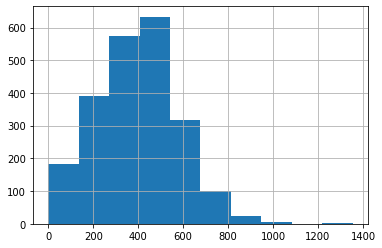

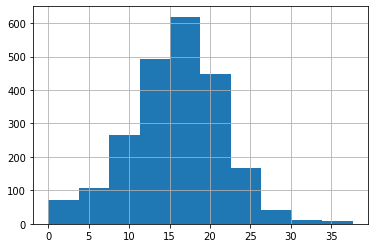

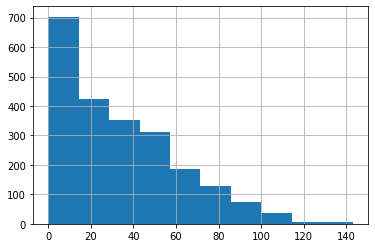

In [196]:
df_tariff_0 = df_tariff_0.fillna(0)
df_tariff_1 = df_tariff_1.fillna(0)

N = [2, 3, 4]
 
columns = list(df_tariff_0)
col = [columns[i] for i in N]
for i in col:
    b = df_tariff_0[i].hist(bins = 10)
    plt.show()

Ниже представлены распределения количества звонков, интернет-трафика, сообщений для тарифа Ультра:

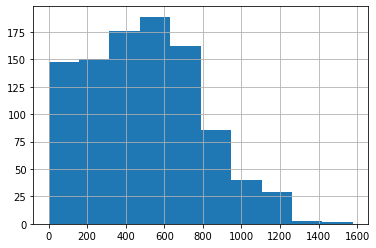

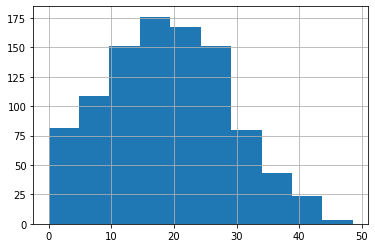

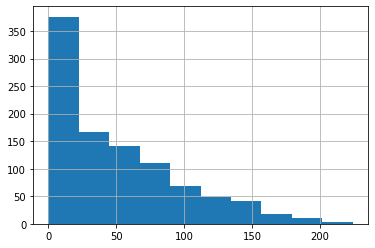

In [197]:
N = [2, 3, 4]
 
columns = list(df_tariff_1)
col = [columns[i] for i in N]
for i in col:
    b = df_tariff_1[i].hist(bins = 10)
    plt.show()

Видим, что распределения тарифа Ультра являются более положительно скошенными распределениями. 

Распределение количества интернет-трафика у тарифа Смарт наиболее близко к нормальному распределению

Далее проверим некоторые гипотезы

Первая проверка:
    - нулевая гипотеза: средняя выручка пользователей тарифов "Смарт" и "Ультра" равна;
    - альтернативная гипотеза: средняя выручка пользователей тарифов "Смарт" и "Ультра" различается.

Параметр значимости примем равным 5%

In [198]:
df_cost_00 = df_cost_0.reset_index()
df_cost_00 = df_cost_00.drop(['index'], axis = 1)

df_cost_11 = df_cost_1.reset_index()
df_cost_11 = df_cost_11.drop(['index'], axis = 1)

In [199]:
from scipy import stats as st

alpha = 0.05

sample_1 = df_cost_00.cost
sample_2 = df_cost_11.cost

results = st.ttest_ind(sample_1, sample_2, equal_var = False)
print('p-значение: ', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение:  6.179723168444488e-274
Отвергаем нулевую гипотезу


Следовательно, средние выручки двух тарифов не равны

Вторая проверка:
    - нулевая гипотеза: средняя выручка пользователей из Москвы и средняя выручка пользователей из других регионов равны;
    - альтернативная гипотеза:  средняя выручка пользователей из Москвы и средняя выручка пользователей из других регионов различны.

In [200]:
df_users.head()

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,1
1,1001,41,NaT,Москва,Иван,Ежов,2018-11-01,0
2,1002,59,NaT,Стерлитамак,Евгений,Абрамович,2018-06-17,0
3,1003,23,NaT,Москва,Белла,Белякова,2018-08-17,1
4,1004,68,NaT,Новокузнецк,Татьяна,Авдеенко,2018-05-14,1


In [201]:
df_hyp_2 = pd.concat([df_cost_0, df_cost_1])
df_hyp_2 = df_hyp_2.sort_values(by = ['user'])
df_hyp_2 = df_hyp_2.rename(columns = {'user': 'user_id'}).drop(['tariff'], axis = 1)
df_hyp_2.head()

,user_id,month,calls_duration,gb_used,messages_count,cost
2,1000,7,0.0,0.0,0.0,1950.0
0,1000,5,0.0,0.0,0.0,1950.0
5,1000,10,0.0,0.0,0.0,1950.0
4,1000,9,0.0,0.0,0.0,1950.0
3,1000,8,0.0,0.0,0.0,1950.0


In [205]:
df_hyp_2 = df_hyp_2.join(df_users.set_index('user_id'), on = 'user_id')

ValueError: columns overlap but no suffix specified: Index(['age', 'churn_date', 'city', 'first_name', 'last_name', 'reg_date',
       'tariff'],
      dtype='object')

In [208]:
df_hyp_0 = df_hyp_2.loc[df_hyp_2.city == 'Москва', ['cost', 'city']]
df_hyp_1 = df_hyp_2.loc[df_hyp_2.city != 'Москва', ['cost', 'city']]

In [213]:
df_hyp_0 = df_hyp_0.reset_index()
df_hyp_0 = df_hyp_0.drop(['index'], axis = 1)

df_hyp_1 = df_hyp_1.reset_index()
df_hyp_1 = df_hyp_1.drop(['index'], axis = 1)

In [214]:
sample_1 = df_hyp_0.cost
sample_2 = df_hyp_1.cost

results = st.ttest_ind(sample_1, sample_2, equal_var = False)
print('p-значение: ', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение:  0.46532858228722906
Не получилось отвергнуть нулевую гипотезу


Делаем вывод, что средняя выручка с московских и иногородних пользователей может быть равной